In [83]:
import os
from csv import DictReader
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [126]:
data = {
    'FCN': {
        'loss': [0.9329, 0.6877, 0.5818, 0.4957, 0.4113, 0.3403, 0.2834, 0.2336, 0.2105, 0.1893],
        'accuracy': [0.5877, 0.7195, 0.7671, 0.8040, 0.8389, 0.8691, 0.8904, 0.9087, 0.9194],
        'val_loss': [0.9059, 0.9118, 0.9205, 1.1737, 1.2138, 1.2014, 1.3114, 1.4412, 1.5395, 1.6290],
        'val_accuracy': [0.5985, 0.6349, 0.6524, 0.6087, 0.6139, 0.6346, 0.6220, 0.6140, 0.6179, 0.6127],
        'test_loss': 1.6295,
        'test_accuracy': 0.6176
    },
    'CNN': {
        'loss': [0.7650, 0.4972, 0.3364, 0.2171, 0.1629, 0.1218, 0.1104, 0.0912, 0.0805, 0.0738],
        'accuracy': [0.6755, 0.7976, 0.8619, 0.9092, 0.9332, 0.9497, 0.9555, 0.9640, 0.9679, 0.9716],
        'val_loss': [0.7355, 0.6776, 0.7369, 1.0722, 1.0152, 1.2365, 1.1715, 1.2838, 1.4765, 1.5343],
        'val_accuracy': [0.6963, 0.7212, 0.7252, 0.7175, 0.7333, 0.7300, 0.7452, 0.7488, 0.7443, 0.7480],
        'test_loss': 1.5662,
        'test_accuracy': 0.7454
    },
    'AE': {
        'loss': [0.8787, 0.7192, 0.6440, 0.5986, 0.5610, 0.5276, 0.5011, 0.4701, 0.4471, 0.4226],
        'accuracy': [0.6164, 0.7028, 0.7378, 0.7577, 0.7759, 0.7899, 0.8020, 0.8135, 0.8240, 0.8347],
        'val_loss': [0.9228, 0.8551, 0.9090, 0.9000, 0.9343, 1.0242, 1.1202, 1.1739, 1.2203, 1.2254],
        'val_accuracy': [0.5914, 0.6413, 0.6378, 0.6514, 0.6551, 0.6352, 0.6248, 0.6171, 0.6184, 0.6169],
        'test_loss': 1.2228,
        'test_accuracy': 0.6187
    }
}

In [128]:
def loss_accuracy_precision_recall_f1_graph(csv_path="", data=None, title="", output_dir='result'):

    history = defaultdict(list)
    if data is None:
        with open(csv_path, 'r') as f:
            for d in DictReader(f):
                for key, value in d.items():
                    history[key].append(float(value))
        if 'precision' in history and 'recall' in history:
            history['f1'] = [2 * precision * recall / (precision + recall) for precision, recall in zip(history['precision'], history['recall'])]
        if 'val_precision' in history and 'val_recall' in history:
            history['val_f1'] = [2 * precision * recall / (precision + recall) for precision, recall in zip(history['val_precision'], history['val_recall'])]
    else:
        history = data
    
    if 'f1' in history:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.set_size_inches(15, 5, forward=True)
    else:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 5, forward=True)

    ax1.plot(np.arange(1, len(history['loss']) + 1), history['loss'], label='train_loss')
    ax1.plot(np.arange(1, len(history['val_loss']) + 1), history['val_loss'], label='val_loss')
    ax1.set(
        xlabel='epoch',
        ylabel='loss',
        title='model loss'
    )
    ax1.legend()

    ax2.plot(np.arange(1, len(history['accuracy']) + 1), history['accuracy'], label='train_accuracy')
    ax2.plot(np.arange(1, len(history['val_accuracy']) + 1), history['val_accuracy'], label='val_accuracy')
    ax2.set(
        xlabel='epoch',
        ylabel='accuracy',
        title='model accuracy'
    )
    ax2.legend()

    if 'f1' in history:
        ax3.plot(np.arange(1, len(history['precision']) + 1), history['precision'], label='train_precision')
        ax3.plot(np.arange(1, len(history['val_precision']) + 1), history['val_precision'], label='val_precision')
        ax3.plot(np.arange(1, len(history['recall']) + 1), history['recall'], label='train_recall')
        ax3.plot(np.arange(1, len(history['val_recall']) + 1), history['val_recall'], label='val_recall')
        ax3.plot(np.arange(1, len(history['f1']) + 1), history['f1'], label='train_f1')
        ax3.plot(np.arange(1, len(history['val_f1']) + 1), history['val_f1'], label='val_f1')
        ax3.set(
            xlabel='epoch',
            ylabel='accuracy',
            title='model precision/recall/F1'
        )
        ax3.legend()

    fig.suptitle(title)

    os.makedirs(output_dir, exist_ok=True)
    plt.savefig(os.path.join(output_dir, f"{title}_loss_accuracy.png"))

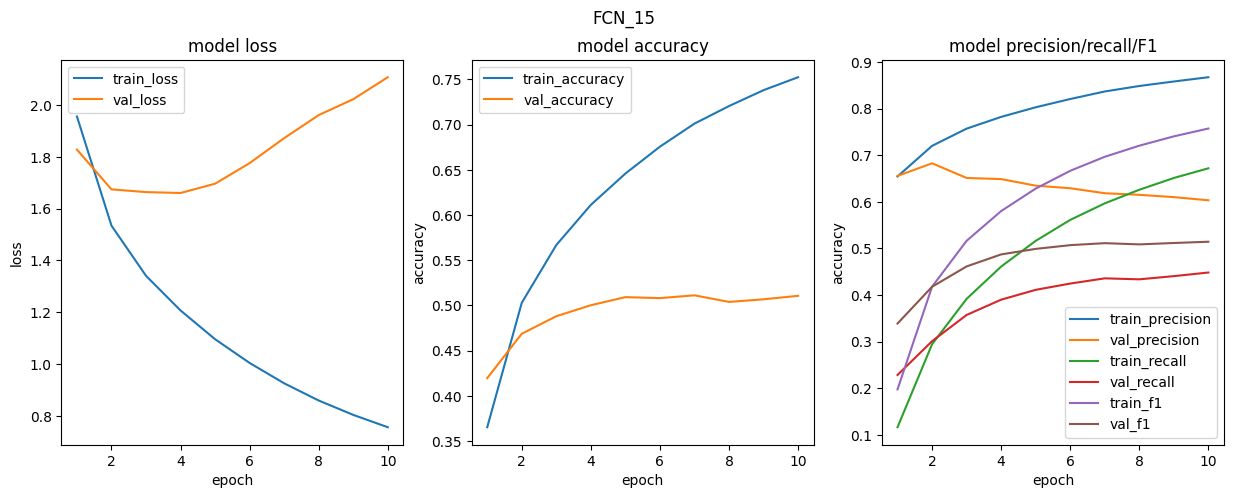

In [114]:
loss_accuracy_precision_recall_f1_graph(os.path.join("result", "CAT_history_15.csv"), 'FCN_15')

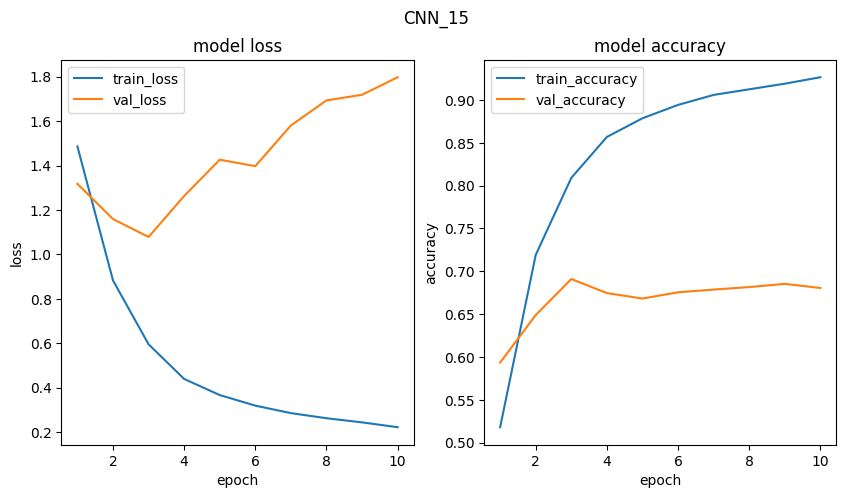

In [120]:
loss_accuracy_precision_recall_f1_graph(os.path.join('result', 'CONV_history_15.csv'), 'CNN_15')

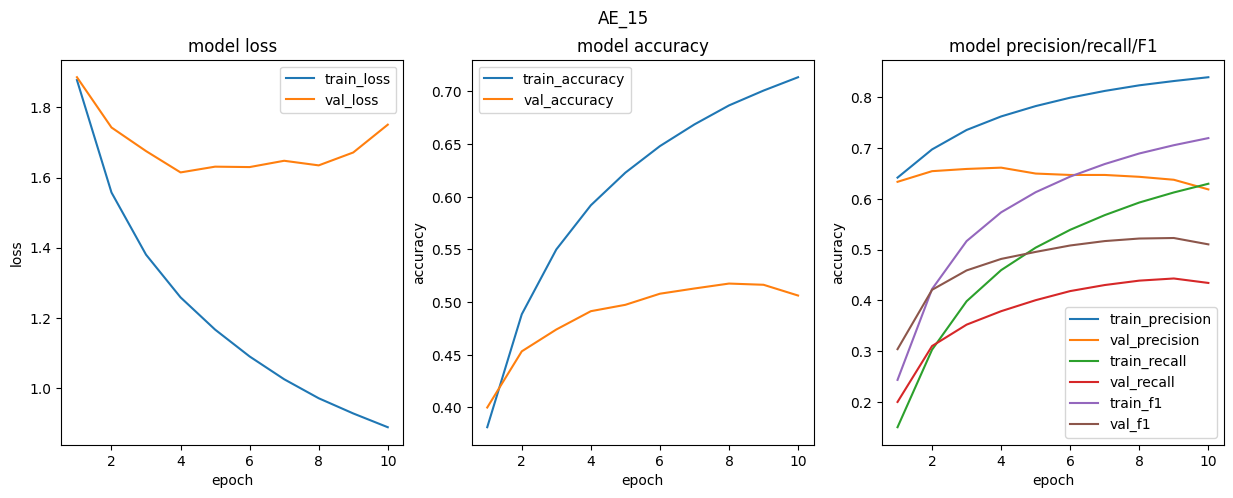

In [121]:
loss_accuracy_precision_recall_f1_graph(os.path.join('result', 'AE_history_15.csv'), 'AE_15')

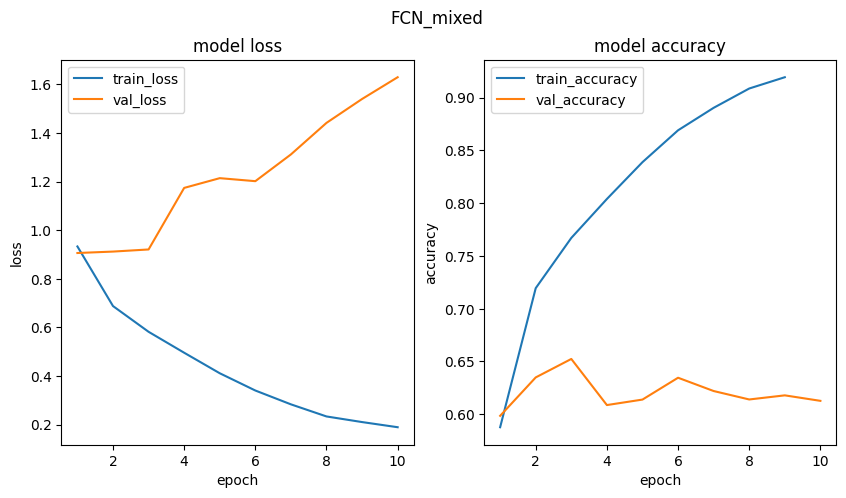

In [129]:
loss_accuracy_precision_recall_f1_graph(data=data['FCN'], title='FCN_mixed')

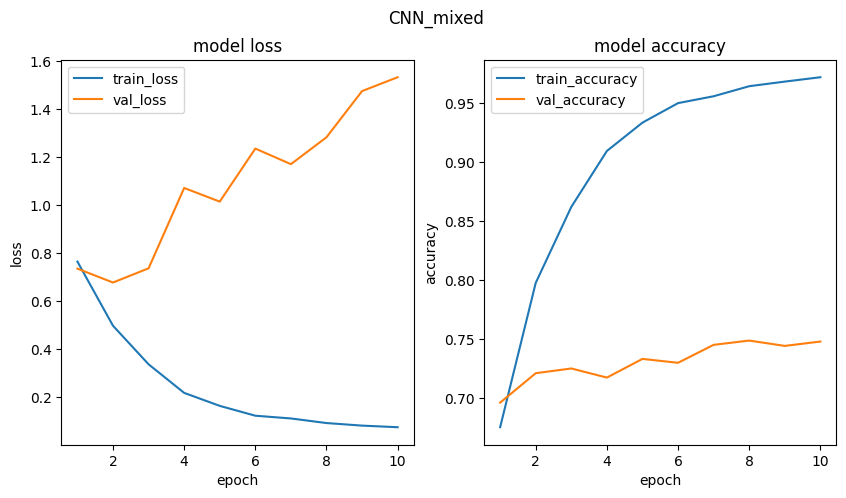

In [130]:
loss_accuracy_precision_recall_f1_graph(data=data['CNN'], title='CNN_mixed')

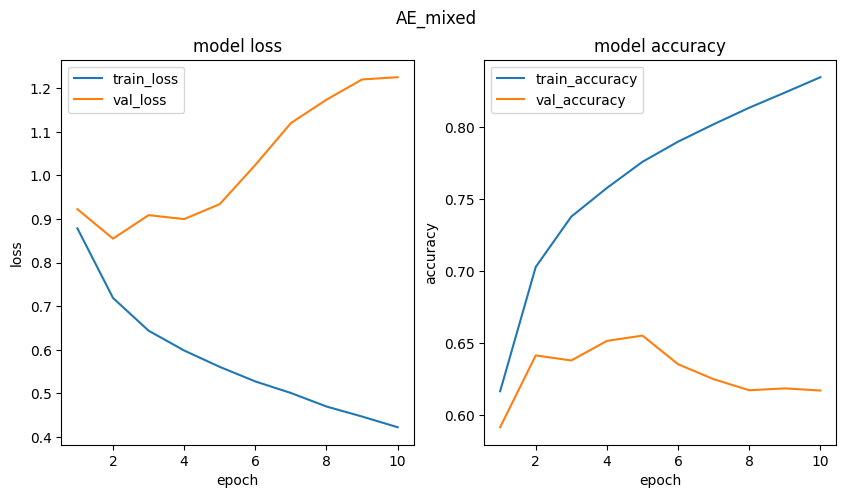

In [131]:
loss_accuracy_precision_recall_f1_graph(data=data['AE'], title='AE_mixed')